In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import shapiro
import scipy.stats as stats

In [32]:
oncesi = pd.DataFrame(np.random.randint(115,125,40))
sonrasi = pd.DataFrame(np.random.randint(120,140,40))

In [20]:
oncesi.head()

,0
0,118
1,120
2,120
3,119
4,124


In [21]:
sonrasi.head()

,0
0,127
1,121
2,138
3,134
4,127


In [22]:
ayrik = pd.concat([oncesi,sonrasi],axis = 1)
ayrik.columns = ["Oncesi","Sonrasi"]
ayrik.head()

,Oncesi,Sonrasi
0,118,127
1,120,121
2,120,138
3,119,134
4,124,127


In [23]:
g_oncesi = np.arange(len(oncesi))
g_oncesi = pd.DataFrame(g_oncesi)#yeni bir sütuna sayılar yazar
g_oncesi[:] = "Oncesi"#yazılan sayılar yerine öncesi yazılır 

A = pd.concat([oncesi,g_oncesi], axis = 1)

g_sonrasi = np.arange(len(sonrasi))
g_sonrasi = pd.DataFrame(g_sonrasi)
g_sonrasi[:] = "Sonrasi"

B = pd.concat([sonrasi,g_sonrasi], axis = 1)

birlikte = pd.concat([A,B])

birlikte.columns = ["Performans","Oncesi-Sonrasi"]

In [24]:
birlikte.head()

,Performans,Oncesi-Sonrasi
0,118,Oncesi
1,120,Oncesi
2,120,Oncesi
3,119,Oncesi
4,124,Oncesi


<AxesSubplot:xlabel='Oncesi-Sonrasi', ylabel='Performans'>

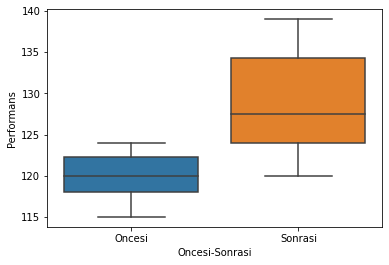

In [25]:
sns.boxplot(x = "Oncesi-Sonrasi", y = "Performans", data = birlikte)

In [27]:
#Varsayım Kontrolleri

In [33]:
shapiro(ayrik.Oncesi)

ShapiroResult(statistic=0.930362343788147, pvalue=0.016550619155168533)

In [30]:
#0.05 ten büyük h0 reddettik

In [34]:
shapiro(ayrik.Sonrasi)

ShapiroResult(statistic=0.9158753156661987, pvalue=0.005726249888539314)

In [35]:
#0.05 ten büyük h0 reddettik

In [38]:
stats.levene(ayrik.Oncesi, ayrik.Sonrasi)

LeveneResult(statistic=21.822508990903323, pvalue=1.226869193979379e-05)

In [39]:
#0.05'ten küçük olduğundan reddedemeyiz

In [40]:
#Uygulaması

In [41]:
stats.ttest_rel(ayrik.Oncesi, ayrik.Sonrasi)

Ttest_relResult(statistic=-8.226095137068913, pvalue=4.737811137304232e-10)

In [42]:
#p value değeri 0.05ten küçük olduğundan h0 hipotezi reddedilir
#öncesi ve sonrasında istatistik anlamda bir farklılık yoktur h0
#yani eğitim işe yaramıştır

In [43]:
#Nonparametrik Bağımlı İki Örneklem Testi

In [44]:
#üstteki varsayımlar karşılanmadı bu testi (wilcoxon) yaparız 

In [46]:
stats.wilcoxon(ayrik.Oncesi, ayrik.Sonrasi)

WilcoxonResult(statistic=18.5, pvalue=2.1291581372048173e-07)

In [47]:
#p value değeri 0.05 ten küçüktür bundan dolayı reddedilir 
#anlamlı bir farklılık gözlenir